Importing the libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

IMPORTING THE DATASET FILE ('DATA.CSV') USING PANDAS AND DISPLAYING THE FIRST FIVE ROWS USING

In [2]:
datadf=pd.read_csv('CE802_Ass_2019_Data.csv')
datadf.head()


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,Class
0,0,0,16,2.02,0.52,-2.35,-1.98,-0.70,85,6,...,-0.07,1.08,15,-0.63,-3.49,-1.68,0.02,15.3,NaN,True
1,0,0,86,-0.90,2.75,0.14,0.83,-0.06,107,1,...,0.17,1.06,-8,-1.21,0.34,0.36,0.61,10.1,NaN,True
2,1,1,165,0.73,1.05,0.10,2.57,-1.65,41,5,...,0.04,0.42,-6,-0.46,-0.62,1.67,2.60,11.0,1.55,False
3,1,1,191,-1.50,0.79,0.33,1.24,1.35,17,2,...,1.74,1.74,15,0.47,0.63,0.08,0.19,6.3,0.95,False
4,1,1,13,0.25,-1.19,-0.90,2.67,0.22,12,8,...,-0.39,1.25,25,-0.09,-2.41,-0.53,-0.77,10.5,NaN,True


In [ ]:
#CALCULATING THE TOTAL NA VALUES AND IT ALL BELONGS TO THE F20 COLUMN

In [3]:
datadf.isna().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15        0
F16        0
F17        0
F18        0
F19        0
F20      172
Class      0
dtype: int64

In [10]:
! pip install pandas-profiling

  Using cached https://files.pythonhosted.org/packages/03/cf/b8cef2778104dc5d319f36dd836efaceb07a037cbf63f27c966b5a193ce9/phik-0.9.9-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/2b/de/6e4dd6d720c49939544352155dc06a08c9f7e4271aa631a559dfbeaaf9d4/missingno-0.4.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/27/24/4f35961e5c669e96f6559760042a55b9bcfcdb82b9bdb3c8753dbe042e35/Jinja2-2.11.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/cc/2e/4307206db63f05ed37e21d4c0d843d0fbcacd62479f8ce99ba0f2c0875e0/tqdm-4.42.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f4/b9/d2a9dbab73995639969f5cf3e6acc646371da65a0fdc3f61cac5bb2c98e4/astropy-4.0-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/0f/2e/12d3e83e90341fc7aff0e42955ab560df4e7f07b847f98302e23eba96289/pytest_pylint-0.15.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/28/5c/cf6

In [4]:
import pandas_profiling as pdp
%matplotlib inline

In [16]:
report = pdp.ProfileReport(datadf,title='Pandas Profiling Report')


DOING THE IMPUTATION OF THE F20 COLUMN USING MEDIAN

In [4]:
datadf=round(datadf.fillna(datadf['F20'].median()),2)
datadf.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,Class
0,0,0,16,2.02,0.52,-2.35,-1.98,-0.70,85,6,...,-0.07,1.08,15,-0.63,-3.49,-1.68,0.02,15.3,0.17,True
1,0,0,86,-0.90,2.75,0.14,0.83,-0.06,107,1,...,0.17,1.06,-8,-1.21,0.34,0.36,0.61,10.1,0.17,True
2,1,1,165,0.73,1.05,0.10,2.57,-1.65,41,5,...,0.04,0.42,-6,-0.46,-0.62,1.67,2.60,11.0,1.55,False
3,1,1,191,-1.50,0.79,0.33,1.24,1.35,17,2,...,1.74,1.74,15,0.47,0.63,0.08,0.19,6.3,0.95,False
4,1,1,13,0.25,-1.19,-0.90,2.67,0.22,12,8,...,-0.39,1.25,25,-0.09,-2.41,-0.53,-0.77,10.5,0.17,True


CALCULATING THE MODE OF F20 COLUMN AND SINCE ITS A NEGATIVE VALUE NOT DOING ITS IMPUTATION

In [5]:
datadf=pd.read_csv('CE802_Ass_2019_Data.csv')
datadf['F20'].mode()

0   -0.13
dtype: float64

FINALLY DOING THE IMPUTATION OF THE F20 COLUMN USING THE MEAN() AND USING THIS AS THE FINAL DATASET TO DO PREDICTIONS.

SEPARATING THE TARGETS AND THE LABELS INTO X,Y. ALL THE COLUMNS TILL F20 GOES IN X AND ONLY THE CLASS COLUMN IS IN Y.

In [6]:
datadf=pd.read_csv('CE802_Ass_2019_Data.csv')
datadf=datadf.fillna(datadf['F20'].mean())
x=datadf.iloc[:,datadf.columns!='Class'].values
y= datadf.iloc[:,20].values

IMPORTING THE DIFFERENT LIBRARIES FROM SKLEARN FOR BUILDING THE CLASSIFIER MODEL AND USING THE TEST_TRAIN_SPLIT FUNCTION TO


DIVIDE THE DATA INTO TRAINING SET AND TESTING SET FOR 75% AND 25% AND USING THE STRATIFY .

In [7]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import sklearn.model_selection as model_selection
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=160,stratify=y)


USING THE STANDARD SCALER FUNCTION TO SCALE THE DATA.

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

CALCULATING THE BEST PARAMETERS FOR DECISION TREE USING THE GRID SEARCH AND DOING 5 FOLD CROSS VALIDATION.

In [9]:
parameters_dt = {'criterion':('gini', 'entropy'),
'max_depth':[3,4,5,6],
'class_weight':('balanced', None),
'presort':(False,True),
}
dt = DecisionTreeClassifier()
clf_dt = GridSearchCV(dt, parameters_dt,cv = 5, scoring = 'accuracy')
clf_dt1=clf_dt.fit(X_train, y_train)
def display(results):
    print(f'the best results are :{results.best_params_}')
display(clf_dt)
dt_pred=clf_dt1.predict(X_test)
accuracy_score(y_test,dt_pred)

the best results are :{'class_weight': None, 'criterion': 'entropy', 'max_depth': 3, 'presort': False}


C:\Users\Dilba\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.568

USING THE BEST PARAMETERS :{'class_weight': None, 'criterion': 'entropy', 
                            'max_depth': 3, 'presort': True}
AND MAKING A MODEL WITH 56.8% ACCURACY

In [10]:
tree = DecisionTreeClassifier(max_depth=3,criterion='entropy',presort= True,random_state=160)
clf_dt=tree.fit(X_train, y_train)
dt_pred = clf_dt.predict(X_test)
dt_pred
accuracy_dt=accuracy_score(y_test, dt_pred)*100
print("Accuracy with Pruned Decision Tree Classifier :"+ str(accuracy_dt)+" %")
metrics.cohen_kappa_score(dt_pred,y_test)

Accuracy with Pruned Decision Tree Classifier :56.8 %


0.02877697841726612

LOADING THE CE802_ASS_2019_TEST DATA AND IMPUTING ITS F20 COLUMN WITH THE MEAN AND THEN USING THE DECISION TREE MODEL TO FILL
COLUMN CLASS WITH THE VALUES OF FAKE NEWS TRUE AND FALSE

In [11]:
test_data=pd.read_csv('CE802_Ass_2019_Test.csv')
f20_mean=test_data['F20'].mean()
test_data['F20'].fillna(f20_mean,inplace=True)
X_final=test_data.iloc[:,0:20].values
y_final=test_data.iloc[:,20].values
dt_y_final=clf_dt.predict(X_final)
dt_y_final
test_data['Class']=dt_y_final
test_data.to_csv("dt_test.csv")

CALCULATING THE BEST PARAMETER FOR THE SUPPORT VECTOR MACHINE WITH KERNEL USING THE GRIDSEARCHCV AND USING THE MODEL

In [12]:
svm = SVC()
parameters_svm =parameters = {
"kernel": ["linear","rbf"], 'gamma':['auto'],
"C":[0.1,1,10]
}
clf_svm=GridSearchCV(svm, parameters_svm,cv = 5, scoring = 'accuracy')
clf_svm1=clf_svm.fit(X_train, y_train)
def display(results):
    print(f'the best results are :{results.best_params_}')
display(clf_svm)
svm_pred=clf_svm1.predict(X_test)
accuracy_score(y_test,svm_pred)

the best results are :{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


C:\Users\Dilba\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.744

USING THE SVM WITH :{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'} PARAMETERS GIVE AN ACCURACY OF 74.4%

In [13]:
svc=SVC(gamma='auto',kernel='rbf',C=10)
svm=svc.fit(X_train,y_train)
svm_pred=svm.predict(X_test)
accuracy_svm=accuracy_score(y_test,svm_pred)*100
print("Accuracy with Support Vector Machine with Kernel :"+ str(accuracy_svm)+" %")
metrics.cohen_kappa_score(svm_pred,y_test)

Accuracy with Support Vector Machine with Kernel :74.4 %


0.47643979057591623

LOADING THE CE802_ASS_2019_TEST DATA AND IMPUTING ITS F20 COLUMN WITH THE MEAN AND THEN USING THE SUPPORT VECTOR KERNEL MODEL TO FILL
TO FILL THE COLUMN CLASS WITH THE VALUES OF FAKE NEWS TRUE AND FALSE USING THE

In [14]:
test_data=pd.read_csv('CE802_Ass_2019_Test.csv')
f20_mean=test_data['F20'].mean()
test_data['F20'].fillna(f20_mean,inplace=True)
X_final=test_data.iloc[:,0:20].values
y_final=test_data.iloc[:,20].values
svm_y_final=svm.predict(X_final)
svm_y_final
test_data['Class']=svm_y_final
test_data.to_csv("svm_test.csv")

CALCULATING THE BEST PARAMETER FOR THE RANDOM FOREST CLASSIFIER USING THE GRIDSEARCHCV AND USING THE MODEL

In [15]:
rf = RandomForestClassifier()

parameters_rf = {'n_estimators': [100,50], 'max_features': ['auto'],
                 'n_jobs': [-1], 'min_samples_leaf': [2,4,], 'random_state':[160],
                 'min_samples_split':[2,6,], 'oob_score': [True,False],
                 'criterion': ['gini'], 'warm_start': [True,False]}

clf_rf=GridSearchCV(rf, parameters_rf,cv = 5, scoring = 'accuracy')
clf_rf1=clf_rf.fit(X_train, y_train)

def display(results):
    print(f'the best results are :{results.best_params_}')    
display(clf_rf)

rf_pred=clf_rf1.predict(X_test)
accuracy_score(y_test,rf_pred)

the best results are :{'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': True, 'random_state': 160, 'warm_start': True}


0.584

USING THE RANDOM FOREST CLASSIFIER WITH:{'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 2,min_samples_split': 6, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': True, 'random_state': 160, 'warm_start': True}
PARAMETERS GIVE AN ACCURACY OF 58.4%

In [16]:
rf=RandomForestClassifier(criterion= "gini",max_features="auto", min_samples_leaf= 2, min_samples_split=6, n_estimators=100, n_jobs=-1, oob_score= True, random_state= 160, warm_start= True)
rf1=rf.fit(X_train,y_train)
rf_pred=rf1.predict(X_test)
accuracy_rf=accuracy_score(y_test,rf_pred)*100
print("Accuracy with Random Forest Classifier :"+ str(accuracy_rf)+" %")
metrics.cohen_kappa_score(rf_pred,y_test)


Accuracy with Random Forest Classifier :58.4 %


0.12868632707774807

LOADING THE CE802_ASS_2019_TEST DATA AND IMPUTING ITS F20 COLUMN WITH THE MEAN AND THEN USING THE RANDOM FOREST CLASSIFIER MODEL TO FILL COLUMN CLASS WITH THE VALUES OF FAKE NEWS TRUE AND FALSE AND USING THE RF1 MODEL.

In [17]:
test_data=pd.read_csv('CE802_Ass_2019_Test.csv')
f20_mean=test_data['F20'].mean()
test_data['F20'].fillna(f20_mean,inplace=True)
X_final=test_data.iloc[:,0:20].values
y_final=test_data.iloc[:,20].values
rf_y_final=rf1.predict(X_final)
rf_y_final
test_data['Class']=rf_y_final
test_data.to_csv("rf_test.csv")

USING THE K NEAREST NEIGHBOR CLASSIFIER AND FINDING THE BEST VALUE OF K FROM 1 TO 15 appending the values of the testing accuracy of the model prediction knn for the values of k from 1 to 16 in the scores list.

In [18]:
k_range=range(1,16)
scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    knn_pred=knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,knn_pred))
print(scores)

[0.632, 0.608, 0.616, 0.632, 0.664, 0.608, 0.616, 0.624, 0.632, 0.632, 0.64, 0.624, 0.656, 0.64, 0.64]


In [19]:
The graph clearly shows the highest value of accuracy is 66% when k=5

SyntaxError: invalid syntax (<ipython-input-19-3d349d4b79bb>, line 1)

Text(0, 0.5, 'Testing Accuracy')

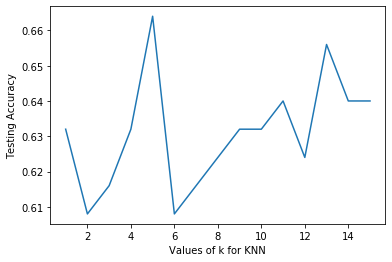

In [20]:
plt.plot(k_range,scores)
plt.xlabel('Values of k for KNN')
plt.ylabel('Testing Accuracy')

THE NEAREST NEIGHBOR IS 14 AND SCORE IS 69.6% USING THE K NEAREST 14 NEIGHBOR ON THE TESTING SET AND GETTING THE ACCURACY 69.6%

In [21]:
clf_knn= KNeighborsClassifier(5)
clf_knn=clf_knn.fit(X_train,y_train)
knn_pred=clf_knn.predict(X_test)
accuracy_knn=round(accuracy_score(y_test,knn_pred)*100,2)
print("Accuracy with K :"+ str(accuracy_knn)+" %")
metrics.cohen_kappa_score(knn_pred,y_test)


Accuracy with K :66.4 %


0.2990654205607477

LOADING THE CE802_ASS_2019_TEST DATA AND IMPUTING ITS F20 COLUMN WITH THE MEAN AND THEN USING THE K NEAREST NEIGHBOR CLASSIFIER MODEL TO FILL COLUMN CLASS WITH THE VALUES OF FAKE NEWS TRUE AND FALSE AND USING THE clf_knn MODEL

In [22]:
test_data=pd.read_csv('CE802_Ass_2019_Test.csv')
f20_mean=test_data['F20'].mean()
test_data['F20'].fillna(f20_mean,inplace=True)
X_final=test_data.iloc[:,0:20].values
y_final=test_data.iloc[:,20].values
knn_y_final=clf_knn.predict(X_final)
knn_y_final
test_data['Class']=knn_y_final
test_data.to_csv("knn_test.csv")

Comparison of all the classifiers used, using Kfold=5 times

In [23]:
Classifiers=('Decision Tree','Support Vector Machines(Kernel)','Random Forest','K Nearest Neighbor')
scores = []
models = [clf_dt,svm,rf1,clf_knn]
for model in models:
    score = cross_val_score(model, X_train, y_train, scoring = 'accuracy', cv = 5, n_jobs = -1).mean()
    scores.append(score)


In [24]:
mode = pd.DataFrame(scores, index = Classifiers, columns = ['score']).sort_values(by = 'score',
ascending = False)
mode





,score
Support Vector Machines(Kernel),0.618780
Random Forest,0.605482
Decision Tree,0.597410
K Nearest Neighbor,0.576324
